# Example usage

To use `energy_manager` in a project:

## 0. Installation

In [2]:
# %pip install energy_manager matplotlib

## 1. Imports

In [3]:
import os
import energy_manager
import matplotlib.pyplot as plt
from energy_manager.expenses.compute_daily_expenses import compute_daily_expenses

## 2. Define mandatory parameters

In [4]:
user_city_name = "Nangis"
openweathermap_api_key = os.getenv("OPEN_WEATHER_API_KEY") # it's supposed that you set your openweathermap api key as an environment variable
user_temperature = 19.5
user_dpe_usage = 1.5

## 3. Define optional parameters if you want

In [5]:
user_insulation_factor = 1.0

## 4. Call the function compute_daily_expenses with your set of parameters

In [6]:
df_daily_expenses = compute_daily_expenses(
        user_temperature=user_temperature,
        user_city_name=user_city_name,
        openweathermap_api_key=openweathermap_api_key,
        user_dpe_usage=user_dpe_usage,
        user_insulation_factor=user_insulation_factor
        )

In [7]:
# You can explore your results and do any manipulation you want
df_daily_expenses.sample(n=10)

,date_time,weather_description,option_0,option_1,option_2,option_3,option_4,building_type,dpe_class
275,2024-12-05 11:00:00,light rain,27.105592,29.087877,29.087877,29.087877,29.087877,Logements collectifs,F
236,2024-12-05 20:00:00,overcast clouds,12.386130,13.291952,13.291952,13.291952,13.291952,Logements collectifs,D
240,2024-12-05 00:00:00,overcast clouds,22.605226,18.580130,18.580130,18.580130,24.258390,Logements collectifs,E
399,2024-12-05 15:00:00,overcast clouds,16.705120,17.926798,17.926798,17.926798,13.730599,Maison,E
170,2024-12-05 02:00:00,overcast clouds,7.563510,6.216748,6.216748,6.216748,6.216748,Logements collectifs,B
307,2024-12-05 19:00:00,overcast clouds,3.531447,3.789709,3.789709,3.789709,3.789709,Maison,A
376,2024-12-05 16:00:00,overcast clouds,13.473955,14.459332,14.459332,14.459332,11.074777,Maison,D
39,2024-12-05 15:00:00,overcast clouds,5.568373,5.975599,5.975599,5.975599,4.576866,Appartement,B
28,2024-12-05 04:00:00,overcast clouds,7.463990,6.134949,6.134949,6.134949,6.134949,Appartement,B
49,2024-12-05 01:00:00,overcast clouds,12.283595,10.096373,10.096373,10.096373,10.096373,Appartement,C


## 5. Results meaning

Columns option_0, option_1, ..., option_4 values are energy costs in euros per square meter.

Settings of these 5 options provided by ENEDIS for EDF consumers are such as :

  - option_0 : energy price is the same at any hour of the day with a value of 25.16 euros/kwh;
  - option_1, ..., option_4 : energy price during peak hour is 27 euros/Kwh and is 20.68 euros/Kwh during for off-peak hours.


The first row of df_daily_expenses means that for the day 2024-12-04 from 00:00:00 to 01:00:00, if your house is an "Appartement" and has a DPE (diagnostic de performance energetique) of class A, your estimated energy cost for the option_1 is 3.37999 euros per square meter for the desired temperature of 20 Celsius degree.

In [8]:
# Further digging on "Appartement" and dpe_class "A"
df = df_daily_expenses[(df_daily_expenses["building_type"] == "Appartement") & (df_daily_expenses["dpe_class"] == "A")]
df.head()

,date_time,weather_description,option_0,option_1,option_2,option_3,option_4,building_type,dpe_class
0,2024-12-05 00:00:00,overcast clouds,4.795048,3.941240,3.941240,3.941240,5.145719,Appartement,A
1,2024-12-05 01:00:00,overcast clouds,4.776953,3.926367,3.926367,3.926367,3.926367,Appartement,A
2,2024-12-05 02:00:00,overcast clouds,4.813142,3.956112,3.956112,3.956112,3.956112,Appartement,A
3,2024-12-05 03:00:00,overcast clouds,4.749812,3.904058,3.904058,3.904058,3.904058,Appartement,A
4,2024-12-05 04:00:00,overcast clouds,4.749812,3.904058,3.904058,3.904058,3.904058,Appartement,A


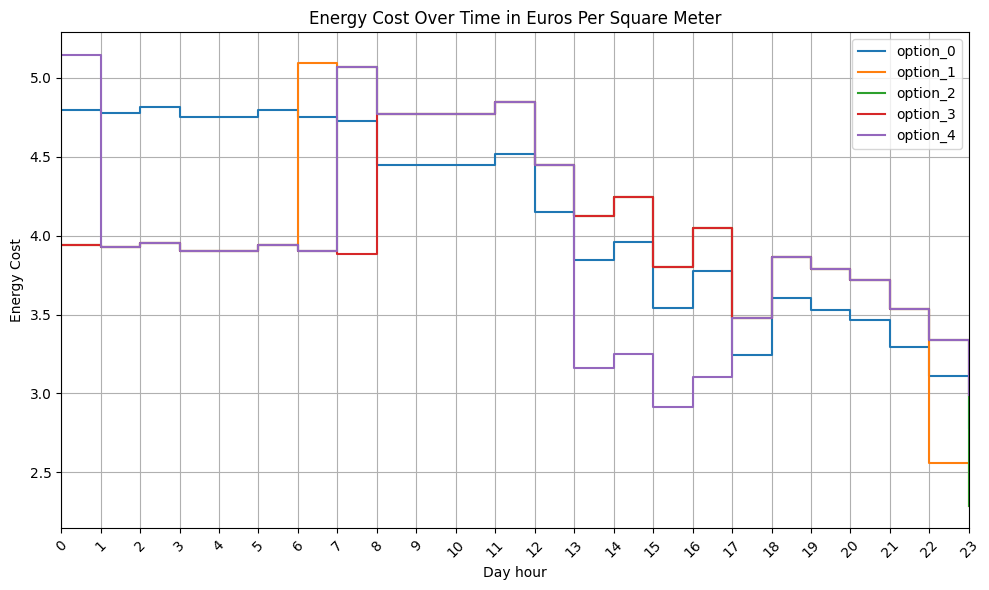

In [9]:
# Some plot
plt.figure(figsize=(10, 6))

# Plot each option
for option in ['option_0', 'option_1', 'option_2', 'option_3', 'option_4']:
    plt.step(df.date_time.dt.hour, df[option], where='post', label=option)

# Adding labels and title
plt.title('Energy Cost Over Time in Euros Per Square Meter')
plt.xlabel('Day hour')
plt.ylabel('Energy Cost')
plt.xticks(rotation=45)
plt.xticks(range(24))
plt.xlim(0, 23)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()

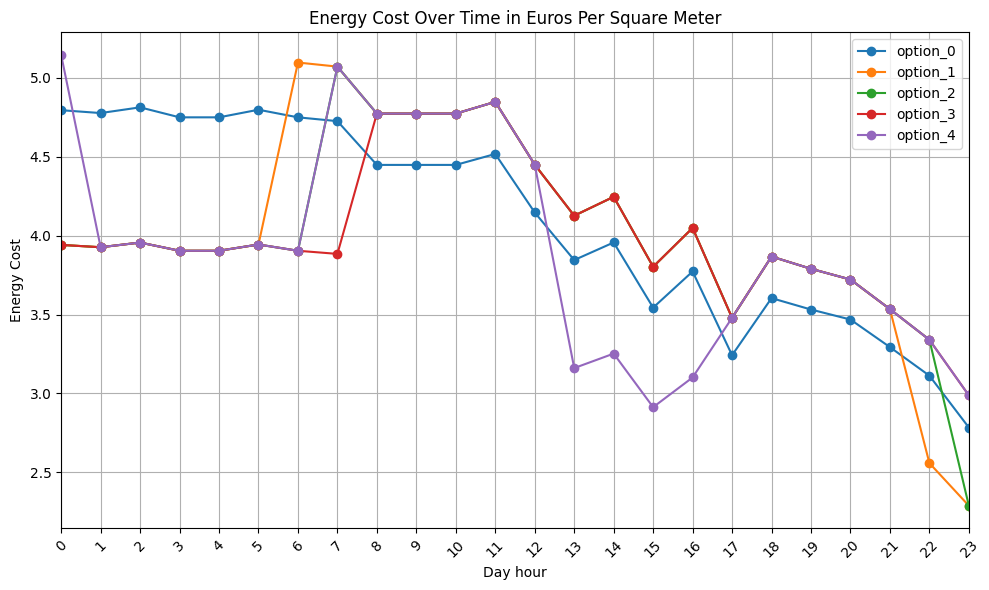

In [10]:
# Some plot
plt.figure(figsize=(10, 6))

# Plot each option
for option in ['option_0', 'option_1', 'option_2', 'option_3', 'option_4']:
    plt.plot(df.date_time.dt.hour, df[option], marker='o', label=option)

# Adding labels and title
plt.title('Energy Cost Over Time in Euros Per Square Meter')
plt.xlabel('Day hour')
plt.ylabel('Energy Cost')
plt.xticks(rotation=45)
plt.xticks(range(24))
plt.xlim(0, 23)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()

#### This can be an insight for how to chose your energy contract with EDF based on your consumption hours. 